20MCS1008
ANN MARIYA XAVIER

In [1]:
library(dplyr)
PATH <- "https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv"
df <- read.csv(PATH) %>%
select(-X) %>% 
mutate(poison = factor(poison, ordered = TRUE))
glimpse(df)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Observations: 48
Variables: 3
$ time   <dbl> 0.31, 0.45, 0.46, 0.43, 0.36, 0.29, 0.40, 0.23, 0.22, 0.21, ...
$ poison <ord> 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...
$ treat  <fct> A, A, A, A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, B, B, ...


In [2]:
levels(df$poison)

[1] "1" "2" "3"

In [3]:
df %>%
    group_by(poison) %>%
    summarise(
        count_poison = n(),
        mean_time = mean(time, na.rm = TRUE),
        sd_time = sd(time, na.rm = TRUE)
    )

poison,count_poison,mean_time,sd_time
1,16,0.617500,0.20942779
2,16,0.544375,0.28936641
3,16,0.276250,0.06227627


In [4]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


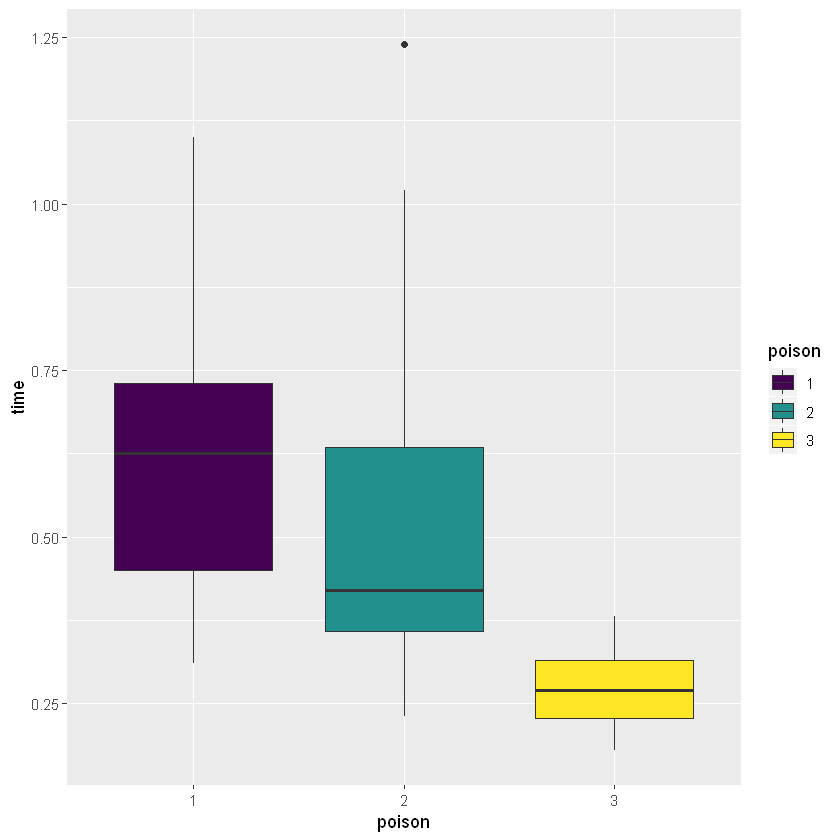

In [5]:
ggplot(df, aes(x = poison, y = time, fill = poison)) +
    geom_boxplot() 
   

In [8]:
anova_one_way <- aov(time~poison, data = df)
summary(anova_one_way)

            Df Sum Sq Mean Sq F value   Pr(>F)    
poison       2  1.033  0.5165   11.79 7.66e-05 ***
Residuals   45  1.972  0.0438                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [9]:
TukeyHSD(anova_one_way)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = time ~ poison, data = df)

$poison
         diff        lwr         upr     p adj
2-1 -0.073125 -0.2525046  0.10625464 0.5881654
3-1 -0.341250 -0.5206296 -0.16187036 0.0000971
3-2 -0.268125 -0.4475046 -0.08874536 0.0020924


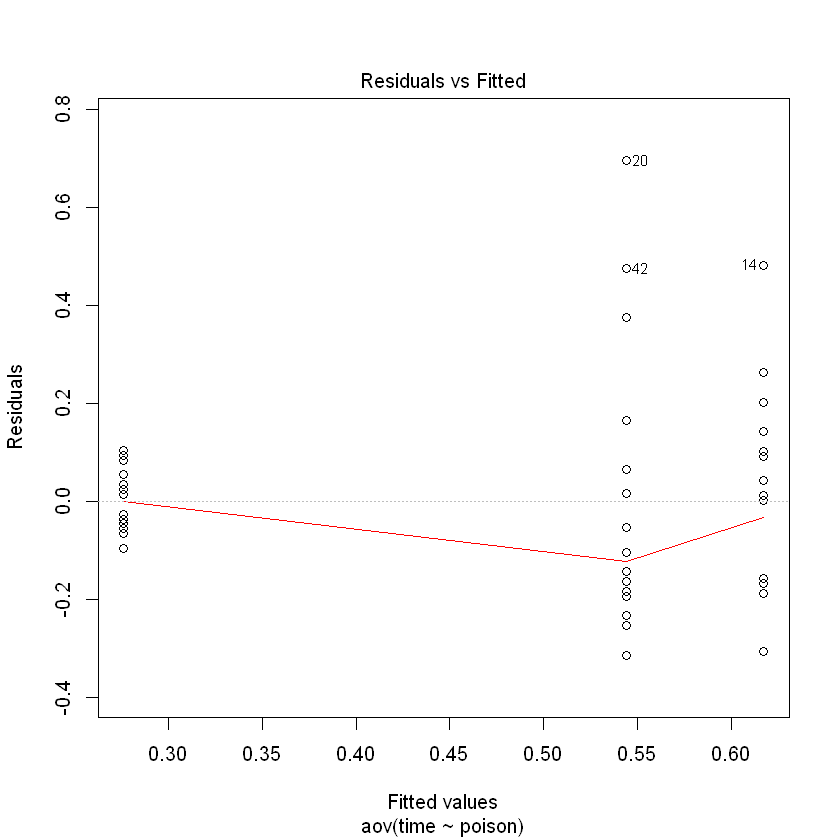

In [10]:
plot(anova_one_way, 1)

In [11]:
library(car)
leveneTest(time~poison, data = df)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



,Df,F value,Pr(>F)
group,2,4.196405,0.02132648
,45,NA,NA


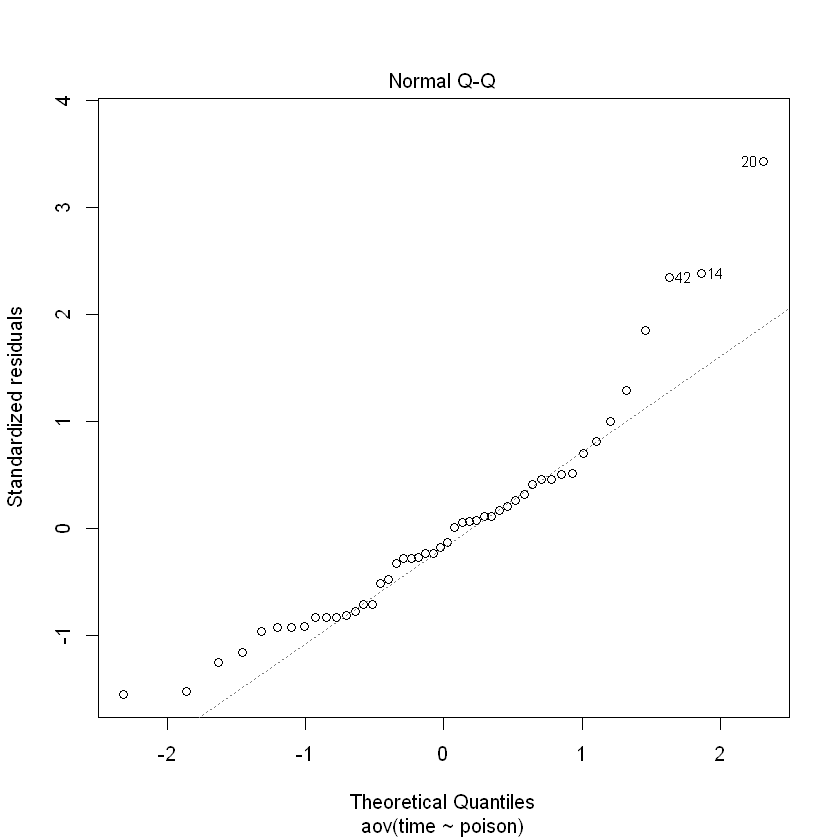

In [12]:
plot(anova_one_way, 2)

In [13]:
aov_residuals <- residuals(anova_one_way)
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.90648, p-value = 0.001025


In [14]:
kruskal.test(time ~ poison, data = df)


	Kruskal-Wallis rank sum test

data:  time by poison
Kruskal-Wallis chi-squared = 25.584, df = 2, p-value = 2.782e-06


In [56]:
anova_two_way <- aov(time~poison + treat, data = df)
summary(anova_two_way)

            Df Sum Sq Mean Sq F value  Pr(>F)    
poison       2 1.0330  0.5165   20.64 5.7e-07 ***
treat        3 0.9212  0.3071   12.27 6.7e-06 ***
Residuals   42 1.0509  0.0250                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

TWO WAY ANOVA

In [15]:
set.seed(1234)
sample_n(df, 10)

time,poison,treat
0.76,1,C
0.72,1,B
0.37,3,B
0.45,1,D
0.38,2,D
0.22,3,A
0.36,2,A
0.71,1,D
0.31,3,D
0.43,1,A


In [16]:
df$poison<- factor(df$poison,
                  levels=c(1,3,2),
                  labels=c("D1","D3","D2"))
head(df)

time,poison,treat
0.31,D1,A
0.45,D1,A
0.46,D1,A
0.43,D1,A
0.36,D2,A
0.29,D2,A


In [17]:
str(df)

'data.frame':	48 obs. of  3 variables:
 $ time  : num  0.31 0.45 0.46 0.43 0.36 0.29 0.4 0.23 0.22 0.21 ...
 $ poison: Ord.factor w/ 3 levels "D1"<"D3"<"D2": 1 1 1 1 3 3 3 3 2 2 ...
 $ treat : Factor w/ 4 levels "A","B","C","D": 1 1 1 1 1 1 1 1 1 1 ...


In [18]:
table(df$poison,df$treat)

    
     A B C D
  D1 4 4 4 4
  D3 4 4 4 4
  D2 4 4 4 4

In [19]:
df %>%
group_by(poison,treat) %>%
summarize(count=n(),mn=mean(time,na.rm = TRUE),sd=sd(time,na.rm=TRUE))

poison,treat,count,mn,sd
D1,A,4,0.4125,0.06946222
D1,B,4,0.8800,0.16083117
D1,C,4,0.5675,0.15671099
D1,D,4,0.6100,0.11284207
D3,A,4,0.2100,0.02160247
D3,B,4,0.3350,0.04654747
D3,C,4,0.2350,0.01290994
D3,D,4,0.3250,0.02645751
D2,A,4,0.3200,0.07527727
D2,B,4,0.8150,0.33630343


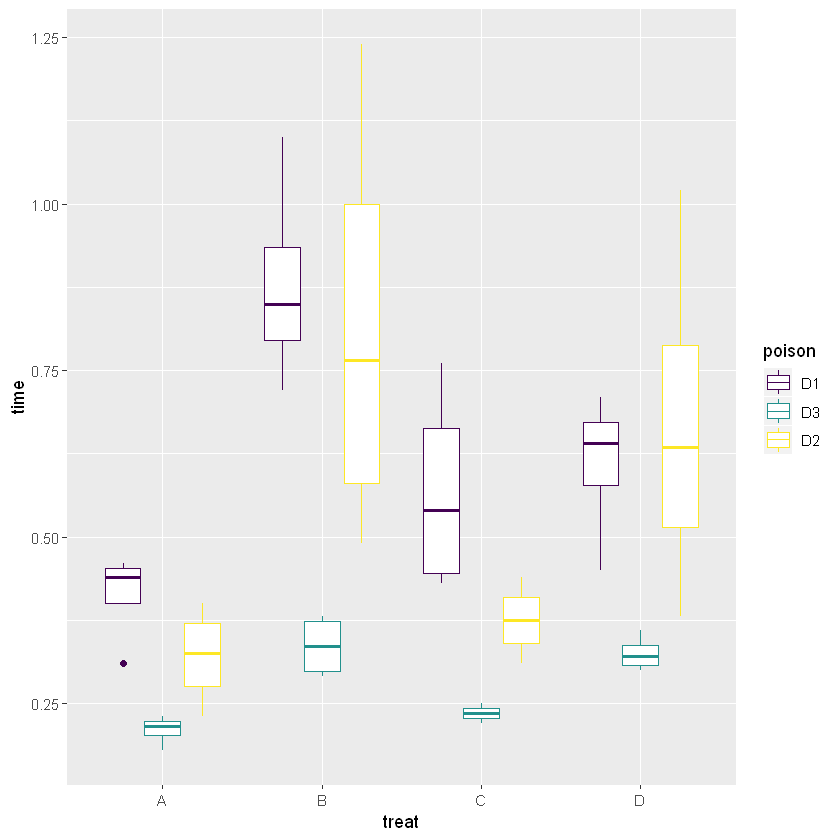

In [20]:
ggplot(df,aes(x=treat,y=time,color=poison))+geom_boxplot()

In [21]:
res.aov2 <- aov(time ~ poison + treat, data = df)
summary(res.aov2)

            Df Sum Sq Mean Sq F value  Pr(>F)    
poison       2 1.0330  0.5165   20.64 5.7e-07 ***
treat        3 0.9212  0.3071   12.27 6.7e-06 ***
Residuals   42 1.0509  0.0250                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [22]:
res.aov3 <- aov(time ~ poison * treat, data = df)
summary(res.aov3)

             Df Sum Sq Mean Sq F value   Pr(>F)    
poison        2 1.0330  0.5165  23.222 3.33e-07 ***
treat         3 0.9212  0.3071  13.806 3.78e-06 ***
poison:treat  6 0.2501  0.0417   1.874    0.112    
Residuals    36 0.8007  0.0222                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [23]:
TukeyHSD(res.aov3, which = "treat")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = time ~ poison * treat, data = df)

$treat
           diff         lwr         upr     p adj
B-A  0.36250000  0.19852116  0.52647884 0.0000047
C-A  0.07833333 -0.08564550  0.24231217 0.5772283
D-A  0.22000000  0.05602116  0.38397884 0.0048556
C-B -0.28416667 -0.44814550 -0.12018783 0.0002333
D-B -0.14250000 -0.30647884  0.02147884 0.1077087
D-C  0.14166667 -0.02231217  0.30564550 0.1107678


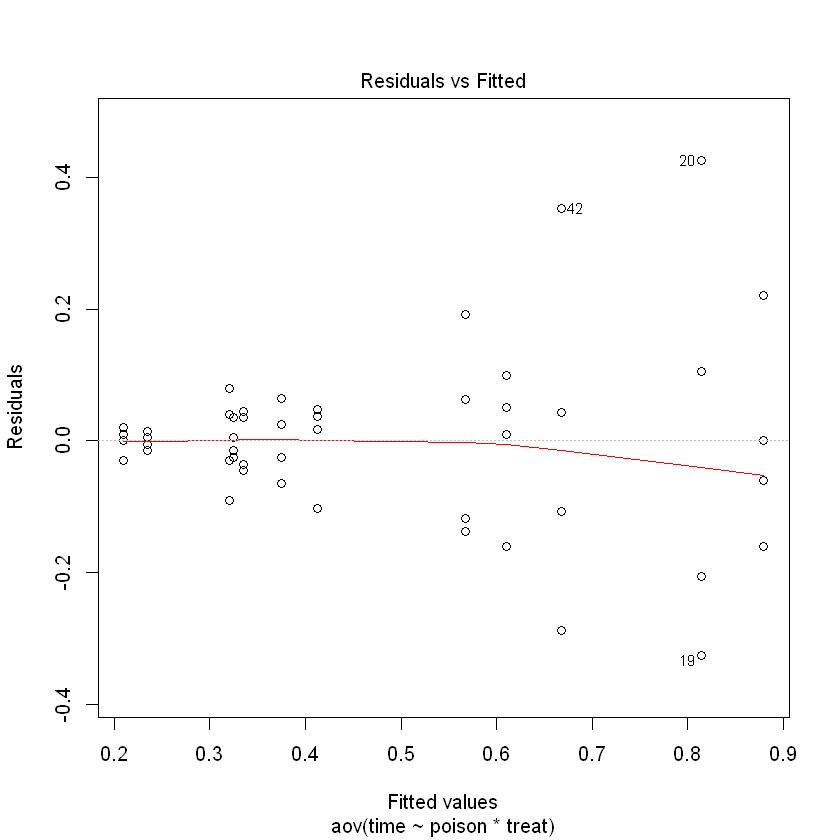

In [24]:
plot(res.aov3, 1)

In [25]:
leveneTest(time ~ poison * treat, data = df)

,Df,F value,Pr(>F)
group,11,4.13233,0.0005833475
,36,NA,NA


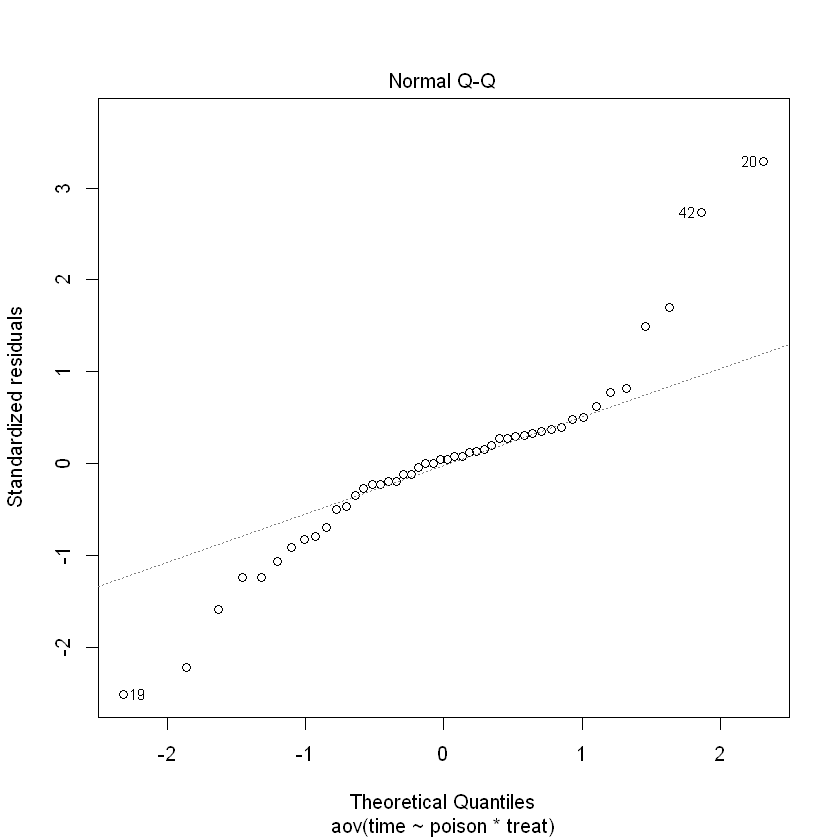

In [26]:
plot(res.aov3, 2)

In [27]:
aov_residuals <- residuals(object = res.aov3)
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.91229, p-value = 0.001607


In [28]:
my_anova <- aov(time ~ poison + treat, data = df)
Anova(my_anova, type = "III")

,Sum Sq,Df,F value,Pr(>F)
(Intercept),1.1844083,1,47.33745,2.156765e-08
poison,1.0330125,2,20.64329,5.703728e-07
treat,0.9212062,3,12.27267,6.696971e-06
Residuals,1.0508625,42,NA,NA


MANOVA test - where there are multiple response variables you can test them simultaneously

In [29]:
my_df <- iris
str(my_df)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [30]:
set.seed(1234)
sample_n(my_df, 10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.2,3.5,1.5,0.2,setosa
5.7,2.6,3.5,1.0,versicolor
6.3,3.3,6.0,2.5,virginica
6.5,3.2,5.1,2.0,virginica
6.3,3.4,5.6,2.4,virginica
6.4,2.8,5.6,2.2,virginica
6.8,3.2,5.9,2.3,virginica
7.9,3.8,6.4,2.0,virginica
6.2,2.9,4.3,1.3,versicolor
7.1,3.0,5.9,2.1,virginica


In [31]:
sepl <- iris$Sepal.Length
petl <- iris$Petal.Length
# MANOVA test
res.man <- manova(cbind(Sepal.Length, Petal.Length) ~ Species, data = iris)
summary(res.man)

           Df Pillai approx F num Df den Df    Pr(>F)    
Species     2 0.9885   71.829      4    294 < 2.2e-16 ***
Residuals 147                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [32]:
summary.aov(res.man)

 Response Sepal.Length :
             Df Sum Sq Mean Sq F value    Pr(>F)    
Species       2 63.212  31.606  119.26 < 2.2e-16 ***
Residuals   147 38.956   0.265                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response Petal.Length :
             Df Sum Sq Mean Sq F value    Pr(>F)    
Species       2 437.10 218.551  1180.2 < 2.2e-16 ***
Residuals   147  27.22   0.185                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Correlation Analysis - finds the linear dependence between two variables

In [33]:
df=mtcars
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


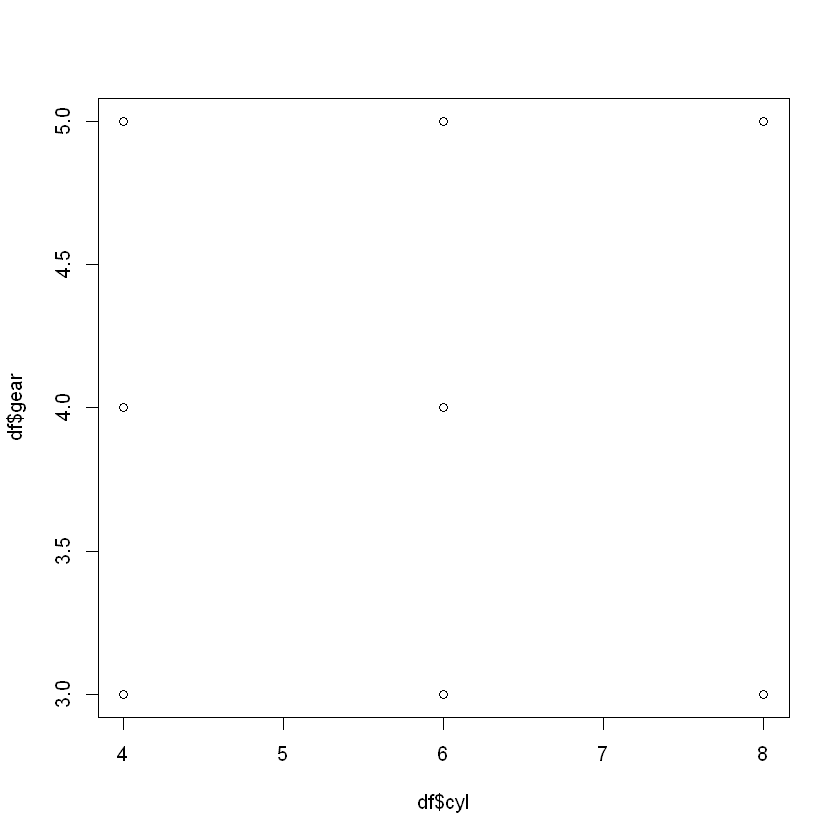

In [34]:
plot(df$cyl,df$gear)

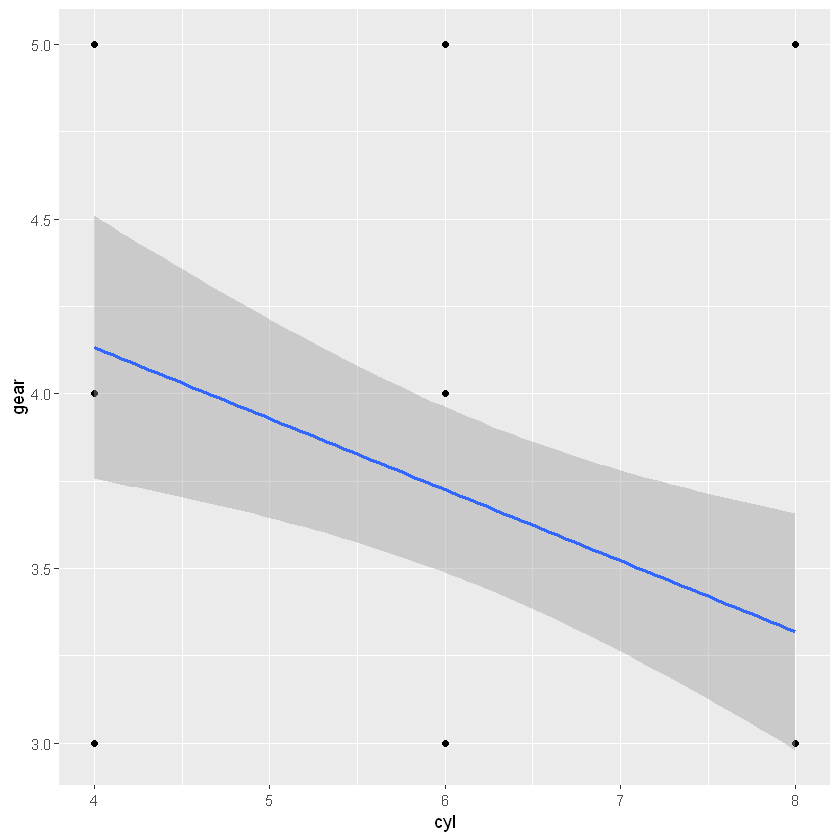

In [35]:
ggplot(df,aes(x=cyl,y=gear))+geom_point()+geom_smooth(method='lm')

In [36]:
#normality test
shapiro.test(df$cyl)


	Shapiro-Wilk normality test

data:  df$cyl
W = 0.75331, p-value = 6.058e-06


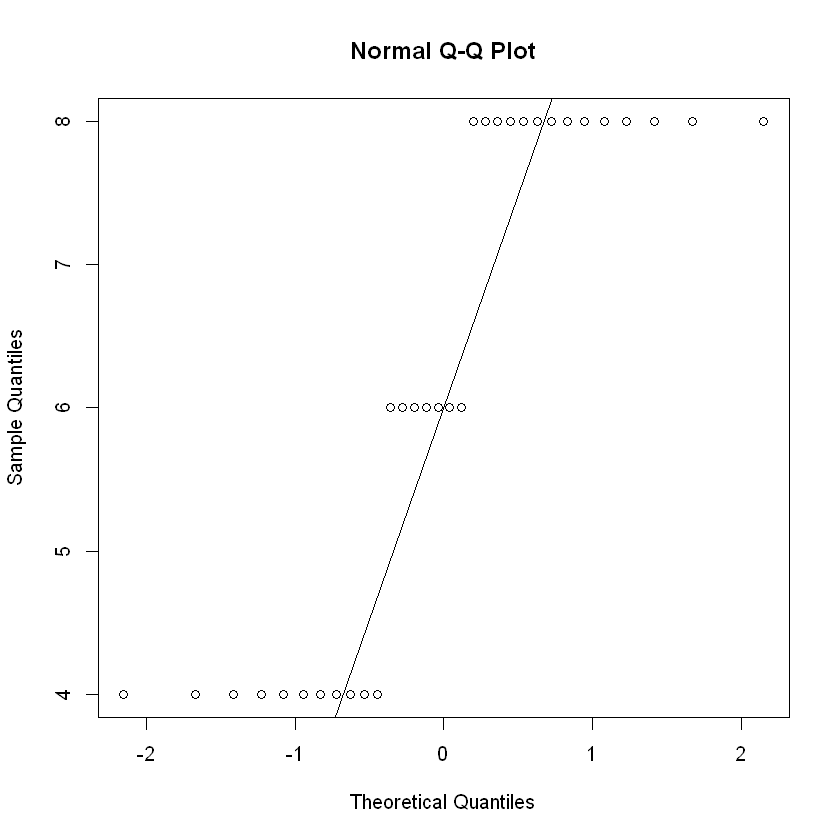

In [37]:
qqnorm(df$cyl)
qqline(df$cyl)

In [38]:
shapiro.test(df$gear)


	Shapiro-Wilk normality test

data:  df$gear
W = 0.77279, p-value = 1.307e-05


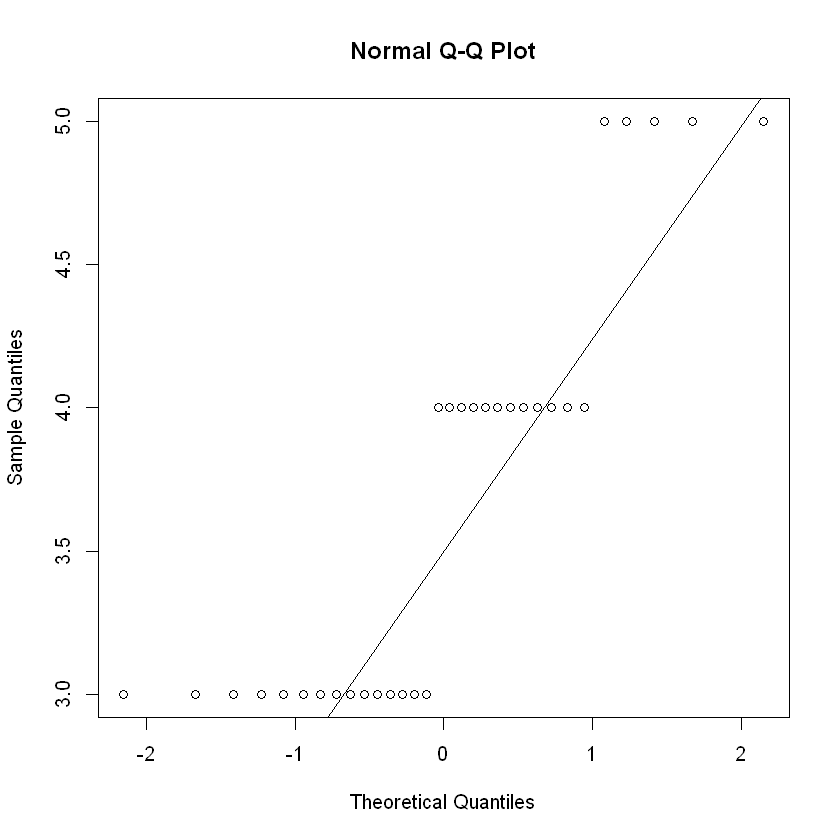

In [39]:
qqnorm(df$gear)
qqline(df$gear)

In [40]:
cor(df$cyl,df$gear)

[1] -0.4926866

In [41]:
cor.test(df$cyl,df$gear)


	Pearson's product-moment correlation

data:  df$cyl and df$gear
t = -3.1011, df = 30, p-value = 0.004173
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7180260 -0.1738615
sample estimates:
       cor 
-0.4926866 


In [42]:
cor.test(df$cyl,df$gear,method="kendall")

Warning message in cor.test.default(df$cyl, df$gear, method = "kendall"):
"Cannot compute exact p-value with ties"


	Kendall's rank correlation tau

data:  df$cyl and df$gear
z = -3.1551, p-value = 0.001604
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.5125435 


In [43]:
cor.test(df$cyl,df$gear,method="spearman")

Warning message in cor.test.default(df$cyl, df$gear, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  df$cyl and df$gear
S = 8534.9, p-value = 0.0007678
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5643105 


In [44]:
df=df[,c(1,3,4,5,6,7)]
head(df)

,mpg,disp,hp,drat,wt,qsec
Mazda RX4,21.0,160,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160,110,3.90,2.875,17.02
Datsun 710,22.8,108,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360,175,3.15,3.440,17.02
Valiant,18.1,225,105,2.76,3.460,20.22


In [45]:
my_res <- cor(df)
my_res

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


In [46]:
install.packages("Hmisc")

also installing the dependencies 'png', 'jpeg', 'checkmate', 'survival', 'Formula', 'latticeExtra', 'gridExtra', 'htmlTable', 'viridis'



package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AKHIL\AppData\Local\Temp\RtmpqGpgkz\downloaded_packages


In [47]:
library(Hmisc)

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



In [48]:
res <- rcorr(as.matrix(my_df))
res

Warning message in storage.mode(x) <- "double":
"NAs introduced by coercion"

ERROR: Error in rcorr(as.matrix(my_df)): NA/NaN/Inf in foreign function call (arg 1)


In [111]:
res$r

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284
